### Keras. CIFAR

In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
from keras.utils import np_utils
import numpy as np

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 123) 

In [6]:
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (45000, 32, 32, 3)
X_valid shape: (5000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(LeakyReLU(alpha = 0.01))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same'))
model.add(LeakyReLU(alpha = 0.01))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(LeakyReLU(alpha = 0.01))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)         

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [18]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'Keras_CIFAR10', verbose = 1, save_best_only = True)

result = model.fit(X_train, y_train, batch_size = 64, epochs = 200, validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint], verbose = 2, shuffle = True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/200
 - 10s - loss: 0.0751 - accuracy: 0.3714 - val_loss: 0.0647 - val_accuracy: 0.4828

Epoch 00001: val_loss improved from inf to 0.06472, saving model to Keras_CIFAR10
Epoch 2/200
 - 8s - loss: 0.0652 - accuracy: 0.4841 - val_loss: 0.0603 - val_accuracy: 0.5288

Epoch 00002: val_loss improved from 0.06472 to 0.06033, saving model to Keras_CIFAR10
Epoch 3/200
 - 8s - loss: 0.0613 - accuracy: 0.5217 - val_loss: 0.0571 - val_accuracy: 0.5646

Epoch 00003: val_loss improved from 0.06033 to 0.05706, saving model to Keras_CIFAR10
Epoch 4/200
 - 8s - loss: 0.0581 - accuracy: 0.5543 - val_loss: 0.0534 - val_accuracy: 0.5894

Epoch 00004: val_loss improved from 0.05706 to 0.05344, saving model to Keras_CIFAR10
Epoch 5/200
 - 8s - loss: 0.0567 - accuracy: 0.5656 - val_loss: 0.0528 - val_accuracy: 0.5968

Epoch 00005: val_loss improved from 0.05344 to 0.05275, saving model to Keras_CIFAR10
Epoch 6/200
 - 9s - loss: 0.0548 - accuracy: 0.58

 - 9s - loss: 0.0398 - accuracy: 0.7110 - val_loss: 0.0400 - val_accuracy: 0.7058

Epoch 00051: val_loss improved from 0.04022 to 0.03998, saving model to Keras_CIFAR10
Epoch 52/200
 - 9s - loss: 0.0400 - accuracy: 0.7103 - val_loss: 0.0421 - val_accuracy: 0.6838

Epoch 00052: val_loss did not improve from 0.03998
Epoch 53/200
 - 8s - loss: 0.0395 - accuracy: 0.7137 - val_loss: 0.0403 - val_accuracy: 0.7008

Epoch 00053: val_loss did not improve from 0.03998
Epoch 54/200
 - 8s - loss: 0.0398 - accuracy: 0.7120 - val_loss: 0.0410 - val_accuracy: 0.6960

Epoch 00054: val_loss did not improve from 0.03998
Epoch 55/200
 - 9s - loss: 0.0397 - accuracy: 0.7125 - val_loss: 0.0420 - val_accuracy: 0.6928

Epoch 00055: val_loss did not improve from 0.03998
Epoch 56/200
 - 9s - loss: 0.0394 - accuracy: 0.7151 - val_loss: 0.0403 - val_accuracy: 0.7062

Epoch 00056: val_loss did not improve from 0.03998
Epoch 57/200
 - 9s - loss: 0.0394 - accuracy: 0.7151 - val_loss: 0.0398 - val_accuracy: 0.7022



 - 9s - loss: 0.0366 - accuracy: 0.7384 - val_loss: 0.0392 - val_accuracy: 0.7110

Epoch 00105: val_loss did not improve from 0.03881
Epoch 106/200
 - 8s - loss: 0.0365 - accuracy: 0.7372 - val_loss: 0.0391 - val_accuracy: 0.7158

Epoch 00106: val_loss did not improve from 0.03881
Epoch 107/200
 - 8s - loss: 0.0364 - accuracy: 0.7393 - val_loss: 0.0390 - val_accuracy: 0.7090

Epoch 00107: val_loss did not improve from 0.03881
Epoch 108/200
 - 9s - loss: 0.0363 - accuracy: 0.7391 - val_loss: 0.0387 - val_accuracy: 0.7094

Epoch 00108: val_loss improved from 0.03881 to 0.03870, saving model to Keras_CIFAR10
Epoch 109/200
 - 9s - loss: 0.0362 - accuracy: 0.7410 - val_loss: 0.0398 - val_accuracy: 0.7032

Epoch 00109: val_loss did not improve from 0.03870
Epoch 110/200
 - 9s - loss: 0.0366 - accuracy: 0.7386 - val_loss: 0.0400 - val_accuracy: 0.7078

Epoch 00110: val_loss did not improve from 0.03870
Epoch 111/200
 - 9s - loss: 0.0363 - accuracy: 0.7396 - val_loss: 0.0386 - val_accuracy: 0.

 - 9s - loss: 0.0351 - accuracy: 0.7502 - val_loss: 0.0384 - val_accuracy: 0.7198

Epoch 00159: val_loss did not improve from 0.03795
Epoch 160/200
 - 9s - loss: 0.0348 - accuracy: 0.7517 - val_loss: 0.0385 - val_accuracy: 0.7162

Epoch 00160: val_loss did not improve from 0.03795
Epoch 161/200
 - 9s - loss: 0.0353 - accuracy: 0.7485 - val_loss: 0.0392 - val_accuracy: 0.7108

Epoch 00161: val_loss did not improve from 0.03795
Epoch 162/200
 - 9s - loss: 0.0352 - accuracy: 0.7480 - val_loss: 0.0388 - val_accuracy: 0.7124

Epoch 00162: val_loss did not improve from 0.03795
Epoch 163/200
 - 9s - loss: 0.0349 - accuracy: 0.7503 - val_loss: 0.0385 - val_accuracy: 0.7144

Epoch 00163: val_loss did not improve from 0.03795
Epoch 164/200
 - 9s - loss: 0.0348 - accuracy: 0.7552 - val_loss: 0.0383 - val_accuracy: 0.7132

Epoch 00164: val_loss did not improve from 0.03795
Epoch 165/200
 - 9s - loss: 0.0345 - accuracy: 0.7526 - val_loss: 0.0381 - val_accuracy: 0.7204

Epoch 00165: val_loss did not

In [19]:
model.load_weights('Keras_CIFAR10')

In [20]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test accuracy: ', score[1])

Test accuracy:  0.7265999913215637


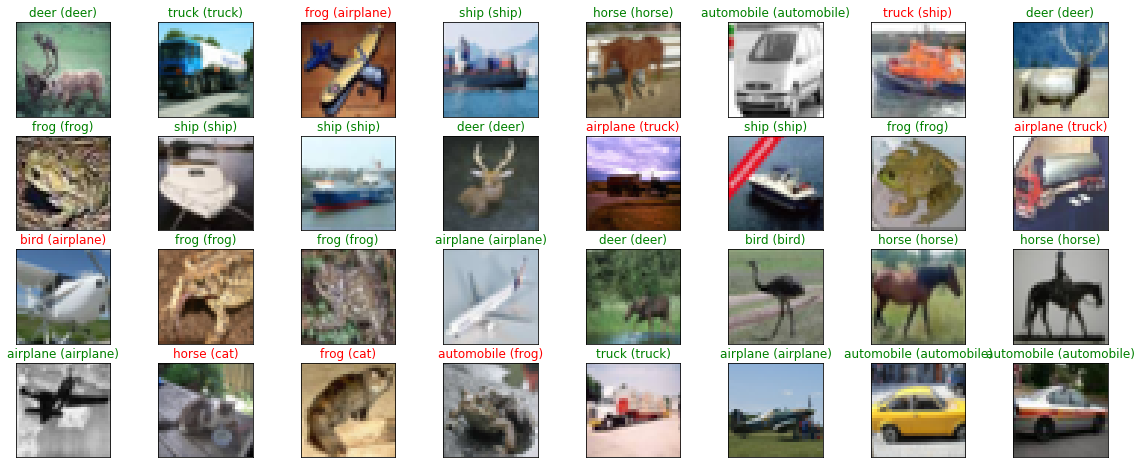

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

y_hat = model.predict(X_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### Different architecture

In [28]:
from keras.layers import BatchNormalization

model_2 = Sequential()
model_2.add(Conv2D(filters = 32, kernel_size = 4, strides = 2, padding = 'same', input_shape = (32, 32, 3)))
model_2.add(LeakyReLU(alpha = 0.02))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters = 64, kernel_size = 4, strides = 2, padding = 'same'))
model_2.add(LeakyReLU(alpha = 0.02))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters = 128, kernel_size = 4, strides = 2, padding = 'same'))
model_2.add(LeakyReLU(alpha = 0.02))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.02))
model_2.add(Flatten())
model_2.add(Dropout(0.5))
model_2.add(Dense(256))
model_2.add(LeakyReLU(alpha = 0.02))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))
model_2.add(Dense(128))
model_2.add(LeakyReLU(alpha = 0.02))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))
model_2.add(Dense(10, activation = 'softmax'))

model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 16, 16, 32)        1568      
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 128)        

In [29]:
optim = keras.optimizers.Adam(learning_rate = 0.007, beta_1 = 0.5, beta_2 = 0.99, epsilon = 1e-06)
model_2.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'Keras_CIFAR10_2', verbose = 1, save_best_only = True)

result = model_2.fit(X_train, y_train, batch_size = 128, epochs = 100, validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint], verbose = 2, shuffle = True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 17s - loss: 1.6425 - accuracy: 0.4093 - val_loss: 1.4846 - val_accuracy: 0.4790

Epoch 00001: val_loss improved from inf to 1.48461, saving model to Keras_CIFAR10_2
Epoch 2/100
 - 16s - loss: 1.2991 - accuracy: 0.5333 - val_loss: 4.7107 - val_accuracy: 0.1950

Epoch 00002: val_loss did not improve from 1.48461
Epoch 3/100
 - 17s - loss: 1.1279 - accuracy: 0.5993 - val_loss: 1.1728 - val_accuracy: 0.5774

Epoch 00003: val_loss improved from 1.48461 to 1.17276, saving model to Keras_CIFAR10_2
Epoch 4/100
 - 17s - loss: 1.0291 - accuracy: 0.6360 - val_loss: 1.0238 - val_accuracy: 0.6328

Epoch 00004: val_loss improved from 1.17276 to 1.02376, saving model to Keras_CIFAR10_2
Epoch 5/100
 - 16s - loss: 0.9556 - accuracy: 0.6652 - val_loss: 1.0030 - val_accuracy: 0.6462

Epoch 00005: val_loss improved from 1.02376 to 1.00301, saving model to Keras_CIFAR10_2
Epoch 6/100
 - 17s - loss: 0.8955 - accuracy: 0.6838 - val_loss: 1.0739 

 - 17s - loss: 0.2829 - accuracy: 0.9023 - val_loss: 1.0416 - val_accuracy: 0.7076

Epoch 00054: val_loss did not improve from 0.79656
Epoch 55/100
 - 17s - loss: 0.2822 - accuracy: 0.9025 - val_loss: 1.5059 - val_accuracy: 0.6256

Epoch 00055: val_loss did not improve from 0.79656
Epoch 56/100
 - 18s - loss: 0.2742 - accuracy: 0.9044 - val_loss: 0.9309 - val_accuracy: 0.7346

Epoch 00056: val_loss did not improve from 0.79656
Epoch 57/100
 - 18s - loss: 0.2756 - accuracy: 0.9036 - val_loss: 1.1433 - val_accuracy: 0.7002

Epoch 00057: val_loss did not improve from 0.79656
Epoch 58/100
 - 18s - loss: 0.2790 - accuracy: 0.9025 - val_loss: 0.9002 - val_accuracy: 0.7304

Epoch 00058: val_loss did not improve from 0.79656
Epoch 59/100
 - 18s - loss: 0.2705 - accuracy: 0.9069 - val_loss: 0.8877 - val_accuracy: 0.7492

Epoch 00059: val_loss did not improve from 0.79656
Epoch 60/100
 - 18s - loss: 0.2569 - accuracy: 0.9110 - val_loss: 0.8824 - val_accuracy: 0.7476

Epoch 00060: val_loss did no

In [13]:
model_2.load_weights('Keras_CIFAR10_2')

In [31]:
score = model_2.evaluate(X_test, y_test, verbose = 0)
print('Test accuracy: ', score[1])

Test accuracy:  0.7465999722480774


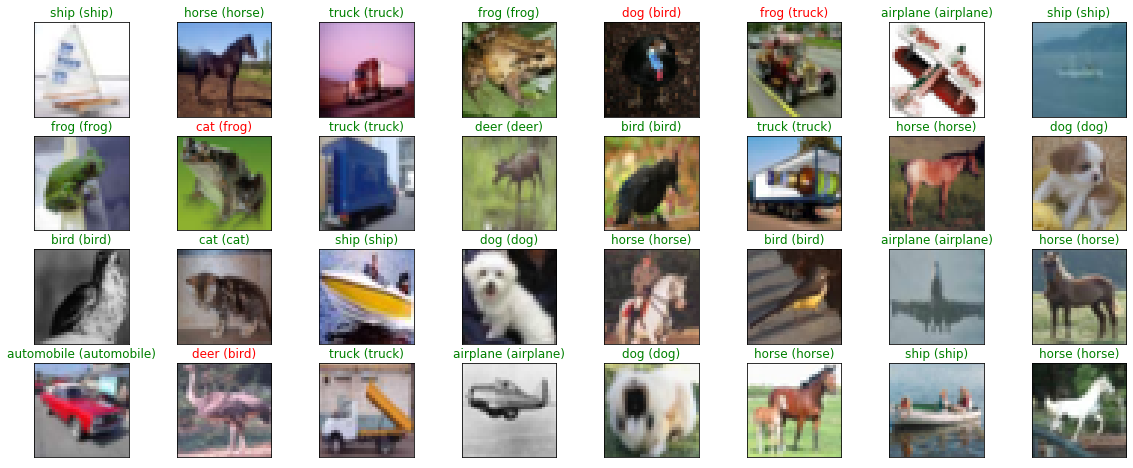

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

y_hat = model_2.predict(X_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))